In [1]:
# Name : Milan Girish Chandiramani, 
# CWID : 20032010, 
# Assignment Number and Name : KDD Project C-5.0 Algorithm - Entropy, 

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [3]:
df = pd.read_csv('archive/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [4]:
# Summarizing each column (e.g. min, max, mean ) Summarize each column
summary = df.describe()

# Print the summary
print(summary)

print('\n min, max, mean only')
Min_Max_Mean=df.describe(include=[float, int]).loc[["min", "max", "mean"]]
print(Min_Max_Mean)

       Diabetes_binary        HighBP      HighChol     CholCheck  \
count     70692.000000  70692.000000  70692.000000  70692.000000   
mean          0.500000      0.563458      0.525703      0.975259   
std           0.500004      0.495960      0.499342      0.155336   
min           0.000000      0.000000      0.000000      0.000000   
25%           0.000000      0.000000      0.000000      1.000000   
50%           0.500000      1.000000      1.000000      1.000000   
75%           1.000000      1.000000      1.000000      1.000000   
max           1.000000      1.000000      1.000000      1.000000   

                BMI        Smoker        Stroke  HeartDiseaseorAttack  \
count  70692.000000  70692.000000  70692.000000          70692.000000   
mean      29.856985      0.475273      0.062171              0.147810   
std        7.113954      0.499392      0.241468              0.354914   
min       12.000000      0.000000      0.000000              0.000000   
25%       25.000000   

In [5]:
# Create a new column for BMI

# 0 = Underweight (below 18)
# 1 = Healthy (19-24)
# 2 = Overweight (25-29)
# 3 = Obese (30-39)
# 4 = Extremely Obese (40+)

def categorize_bmi(bmi):
    if bmi < 18:
        return 0
    elif 18 <= bmi <= 24:
        return 1
    elif 25 <= bmi <= 29:
        return 2
    elif 30 <= bmi <= 39:
        return 3
    else:
        return 4
df['BMI_Category'] = df['BMI'].apply(categorize_bmi)
df['BMI_Category'] = df['BMI_Category'].astype(float)
print(df[['BMI', 'BMI_Category']].head())
# Replace the BMI column with BMI_Category
df['BMI'] = df['BMI_Category']
df.drop(columns=['BMI_Category'], inplace=True)
print(df.head())

    BMI  BMI_Category
0  26.0           2.0
1  26.0           2.0
2  26.0           2.0
3  28.0           2.0
4  29.0           2.0
   Diabetes_binary  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
0              0.0     1.0       0.0        1.0  2.0     0.0     0.0   
1              0.0     1.0       1.0        1.0  2.0     1.0     1.0   
2              0.0     0.0       0.0        1.0  2.0     0.0     0.0   
3              0.0     1.0       1.0        1.0  2.0     1.0     0.0   
4              0.0     0.0       0.0        1.0  2.0     1.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           1.0     0.0  ...            1.0   
1                   0.0           0.0     1.0  ...            1.0   
2                   0.0           1.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenH

In [9]:
attr = df.drop('Diabetes_binary', axis=1)
target = df['Diabetes_binary']
scaler = MinMaxScaler()
# Fit and transform the data
attr = pd.DataFrame(scaler.fit_transform(attr), columns=attr.columns)
attr.head()
X_train, X_test, y_train, y_test = train_test_split(attr, target, test_size=0.3, random_state=42)
    
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
    
y_pred = logistic_regression.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
    
print("Accuracy of Logistic Regression Model:", accuracy)
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", report)
    
    # return logistic_regression, accuracy, conf_matrix, class_report



Accuracy of Logistic Regression Model: 0.7497642399094682

Confusion Matrix:
 [[7672 2929]
 [2378 8229]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.76      0.72      0.74     10601
         1.0       0.74      0.78      0.76     10607

    accuracy                           0.75     21208
   macro avg       0.75      0.75      0.75     21208
weighted avg       0.75      0.75      0.75     21208



## Run and check model accuracy over a range of random states

In [13]:
attr = df.drop('Diabetes_binary', axis=1)
target = df['Diabetes_binary']
scaler = StandardScaler()
# Fit and transform the data
attr = pd.DataFrame(scaler.fit_transform(attr), columns=attr.columns)
attr.head()
best_rs = 0
max_acc = 0
random_states = range(102)
for random_state in random_states:
    X_train, X_test, y_train, y_test = train_test_split(attr, target, test_size=0.3, random_state=random_state)
        
    model = LogisticRegression()
    model.fit(X_train, y_train)
        
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(random_state)
    print("Accuracy of Logistic Regression Model:", accuracy)
    # print("\nConfusion Matrix:\n", cm)
    # print("\nClassification Report:\n", report)
    if accuracy > max_acc:
        max_acc = accuracy
        best_rs = random_state


0
Accuracy of Logistic Regression Model: 0.7502357600905318
1
Accuracy of Logistic Regression Model: 0.7516031686156167
2
Accuracy of Logistic Regression Model: 0.749622783855149
3
Accuracy of Logistic Regression Model: 0.7510373443983402
4
Accuracy of Logistic Regression Model: 0.7488211995473406
5
Accuracy of Logistic Regression Model: 0.7525462089777443
6
Accuracy of Logistic Regression Model: 0.752263296869106
7
Accuracy of Logistic Regression Model: 0.7523104488872123
8
Accuracy of Logistic Regression Model: 0.7519332327423613
9
Accuracy of Logistic Regression Model: 0.7442946058091287
10
Accuracy of Logistic Regression Model: 0.7439173896642777
11
Accuracy of Logistic Regression Model: 0.7475009430403621
12
Accuracy of Logistic Regression Model: 0.754903809883063
13
Accuracy of Logistic Regression Model: 0.753394945303659
14
Accuracy of Logistic Regression Model: 0.7502829121086383
15
Accuracy of Logistic Regression Model: 0.7492927197284044
16
Accuracy of Logistic Regression Mod

In [14]:
print(max_acc, best_rs)

0.7554224820822332 57


In [17]:
X_train, X_test, y_train, y_test = train_test_split(attr, target, test_size=0.3, random_state=best_rs)
    
model = LogisticRegression()
model.fit(X_train, y_train)
    
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Accuracy of Logistic Regression Model:", accuracy)
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", report)


Accuracy of Logistic Regression Model: 0.7554224820822332

Confusion Matrix:
 [[7754 2873]
 [2314 8267]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.77      0.73      0.75     10627
         1.0       0.74      0.78      0.76     10581

    accuracy                           0.76     21208
   macro avg       0.76      0.76      0.76     21208
weighted avg       0.76      0.76      0.76     21208



In [24]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(accuracy, precision, recall, f1)

0.7554224820822332 0.742100538599641 0.7813061147339571 0.7611988398324202


Author:Milan Chandiramani


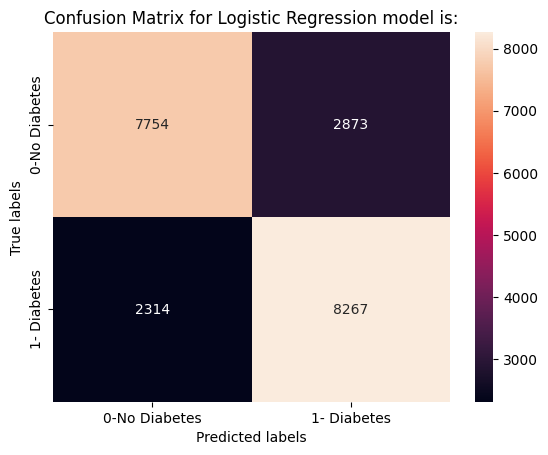

In [19]:
def plot(cm):
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
    
    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title(f"Confusion Matrix for Logistic Regression model is:"); 
    ax.xaxis.set_ticklabels(['0-No Diabetes', '1- Diabetes'])
    ax.yaxis.set_ticklabels(['0-No Diabetes', '1- Diabetes'])
    plt.show()
print("Author:Milan Chandiramani")
plot(confusion_matrix(y_test, y_pred))

## Model Evaluation

In [ ]:
#From Komal
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def evaluate_model(model, X_train, X_test, y_train, y_test):
    """
    Evaluates the model and calculates key metrics: accuracy, precision, recall, F1-score, #Remove these :AUC, Log Loss, and MCC.
    
    Parameters:
    - model: The trained model.
    - X_train: Training features.
    - X_test: Test features.
    - y_train: Training labels.
    - y_test: Test labels.
    
    Returns:
    - A dictionary containing accuracy, precision, recall, F1-score, AUC
    """
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probability for positive class
    
    # Compute various metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_prob)
    
    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1#,
        # "auc": auc
    }


In [57]:
# Milan's model

#Logistic Regression:
lg_reg = {
    'accuracy': 0.7554224820822332, 
    'precision' : 0.742100538599641,
    'recall' : 0.7813061147339571, 
    'f1_score' : 0.7611988398324202
}

c50 = {
    'accuracy': 0.7392493398717465, 
    'precision' : 0.7176844455896246, 
    'recall' : 0.7883762619115011, 
    'f1_score': 0.7513712795611905
}

ann = {'accuracy': 0.7597604677480196, 
       'precision': np.float64(0.7347654912701129), 
       'recall': np.float64(0.8113599848785559), 
       'f1_score': np.float64(0.7711655064001797)
      }

# ann = {'accuracy': 0.7600433798566578, 
#        'precision': np.float64(0.7374200242088881), 
#        'recall': np.float64(0.8060674794442869), 
#        'f1_score': np.float64(0.7702171851718066)
#       }

In [53]:
# Komal's model

svm = {'accuracy': 0.7384630718628525,
 'precision': np.float64(0.7063111851697563),
 'recall': np.float64(0.7363735070575461),
 'f1_score': np.float64(0.7210291303423347)
      }


In [54]:
#Suraj's model
knn = {'accuracy' : 0.71982270841192,
'precision' : 0.7159941573854299,
'recall' : 0.734776091437137,
'f1_score' : 0.7252635472535602
      }
nb = {
'accuracy' : 0.7176065635609205,
'precision' : 0.7250456335863196,
'recall' : 0.7070451564549373,
'f1_score' : 0.7159322677038372
}


In [55]:
#Lilli's model

cart = {'accuracy': 0.7396737080347039, 'precision': 0.7286563400576369, 'recall': 0.7633739031984149, 'f1_score': 0.7456112058240796}
rf = {'accuracy': 0.7527348170501698, 'precision': 0.7316607344387533, 'recall': 0.7965220678574804, 'f1_score': 0.7627149321266968} 

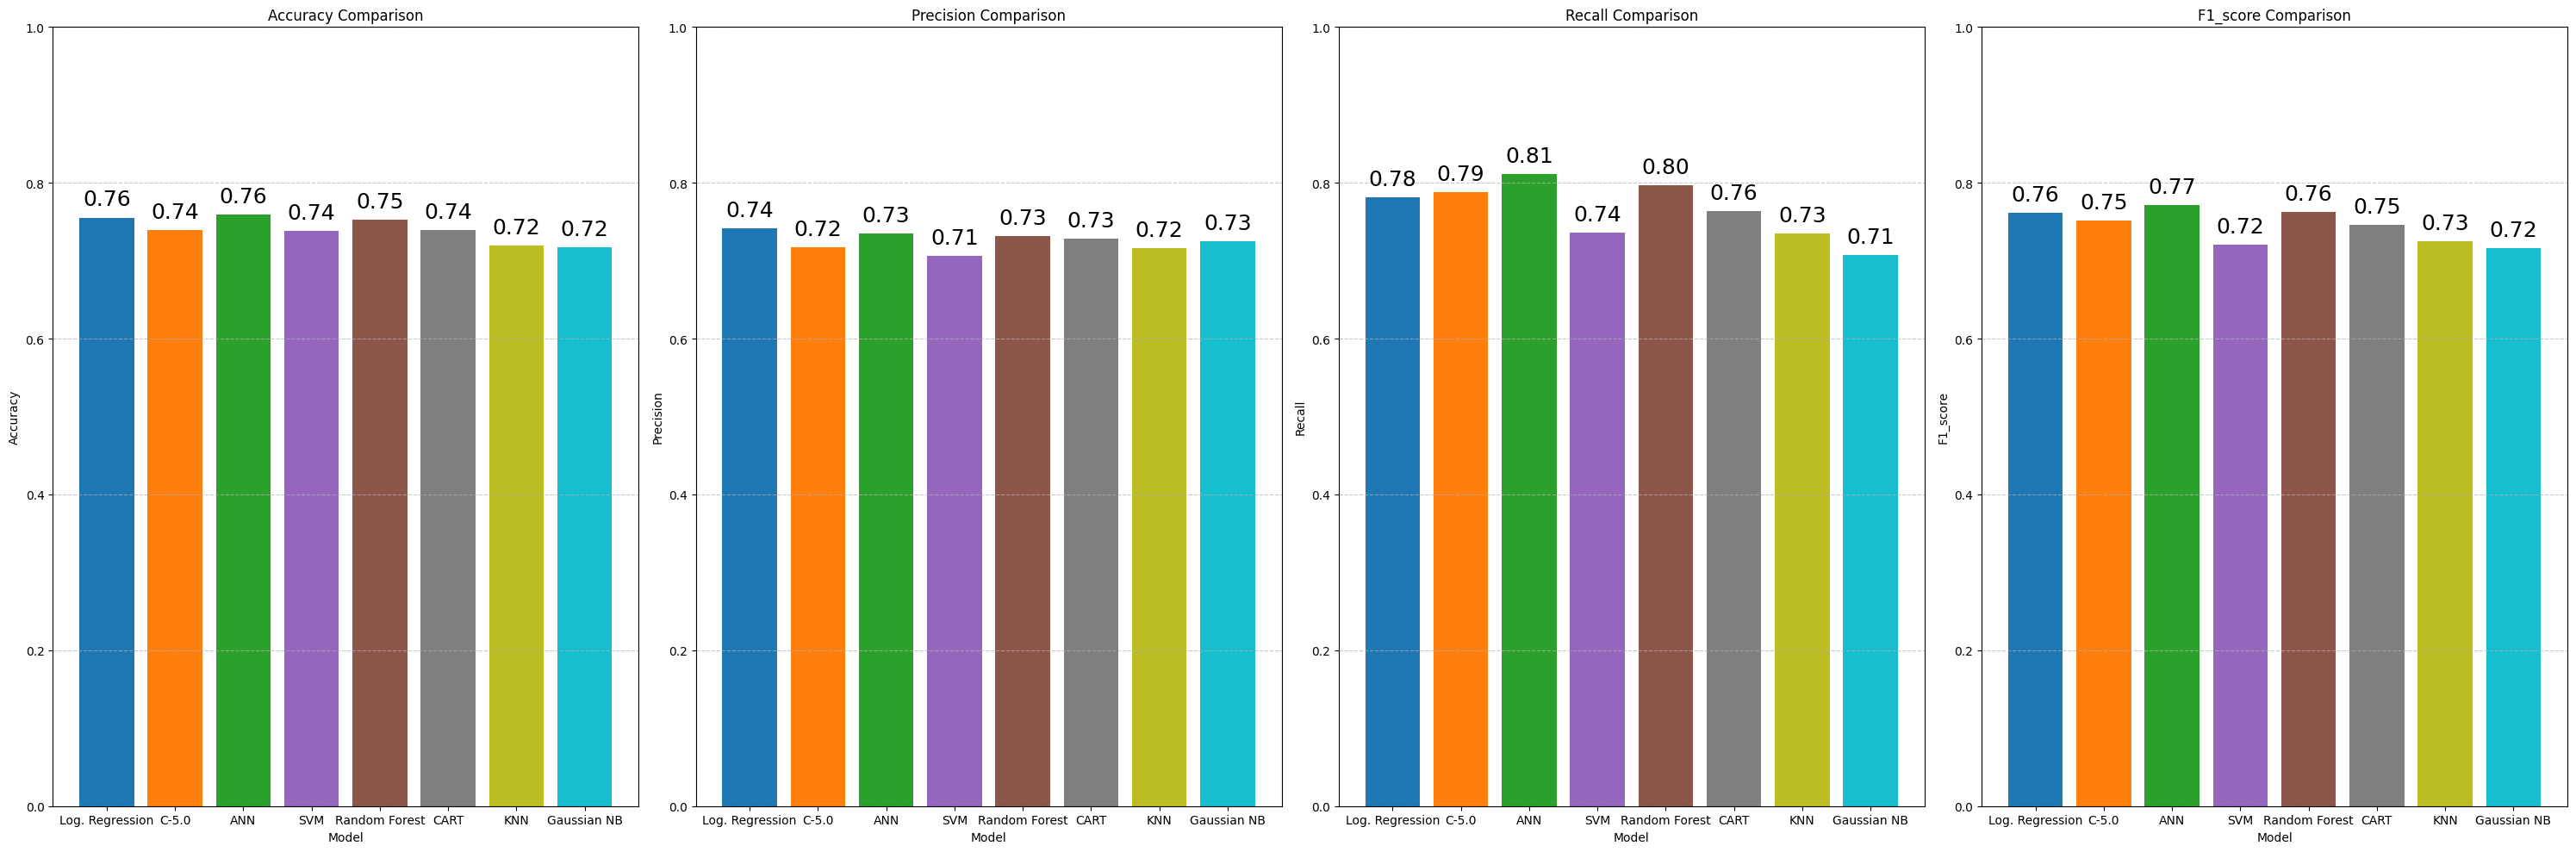

In [58]:
#Komal's code:
import matplotlib.pyplot as plt
import numpy as np

# Assuming the model_comparison dictionary has the results for each model stored
# Example model_comparison (replace this with your actual model results stored in the dictionary)
model_comparison = {
    "Log. Regression": lg_reg,
    "C-5.0" : c50,
    "ANN" : ann,
    "SVM": svm,
    "Random Forest": rf,
    "CART": cart,
    "KNN": knn,
    "Gaussian NB" : nb
}

# Define the metrics to compare
metrics = ['accuracy', 'precision', 'recall', 'f1_score']

# Create a plot for the comparison
fig, axes = plt.subplots(1, len(metrics), figsize=(30, 10))

# Define a color palette for the models (you can choose any color palette)
colors = plt.cm.tab10(np.linspace(0, 1, len(model_comparison)))  # Generate unique colors for each model

# Prepare data for plotting
for i, metric in enumerate(metrics):
    # Extract the metric values for each model from the model_comparison dictionary
    results = [model_comparison[model_name][metric] for model_name in model_comparison]
    
    # Plot the bar chart for the current metric
    bars = axes[i].bar(model_comparison.keys(), results, color=colors)
    axes[i].set_title(f'{metric.capitalize()} Comparison')
    axes[i].set_xlabel('Model')
    axes[i].set_ylabel(metric.capitalize())
    axes[i].set_ylim(0, 1)  # Since metrics are probabilities, limit y-axis to 0-1
    
    # Add the grid for better readability
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)
    
    # Annotate each bar with its value
    for bar in bars:
        yval = bar.get_height()  # Get the height (value) of the bar
        axes[i].text(bar.get_x() + bar.get_width() / 2, yval + 0.01,  # Positioning the value slightly above the bar
                     f'{yval:.2f}', ha='center', va='bottom', fontsize=18)  # Display the value with 2 decimal places

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()